<a href="https://colab.research.google.com/github/BZ6/PINDeepLearning/blob/lab2/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В рамках этой лабораторной работы будут использоваться сверточные нейронные сети. Набор библиотек прежний, импортируйте все необходимые слои и т.п., задачи - классификация на изображениях.

In [ ]:
!pip install tensorflow numpy matplotlib opendatasets

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, VGG16
import matplotlib.pyplot as plt
import numpy as np
import opendatasets as od
import random

In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU is available")
    for gpu in gpus:
        print(f"GPU Name: {gpu.name}")
else:
    print("GPU is not available")

GPU is available
GPU Name: /physical_device:GPU:0


В первую очередь вернемся к MNIST и решим вё ту же задачу классификации изображений, используя сверточную архитектуру. Также допускается использование Dropout, pooling, flatten. Выходной слой - полносвязный. Значение точности выше 98% считается удовлетворительным для выполнения этого пункта. Постройте кривые обучения для обучающей и валидационной выборок.  

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9026 - loss: 0.3275 - val_accuracy: 0.9833 - val_loss: 0.0485
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9816 - loss: 0.0622 - val_accuracy: 0.9861 - val_loss: 0.0402
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9861 - loss: 0.0451 - val_accuracy: 0.9889 - val_loss: 0.0310
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9880 - loss: 0.0363 - val_accuracy: 0.9907 - val_loss: 0.0258
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9904 - loss: 0.0302 - val_accuracy: 0.9902 - val_loss: 0.0279
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9920 - loss: 0.0244 - val_accuracy: 0.9915 - val_loss: 0.0243
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9932 - loss: 0.0208 - val_accuracy: 0.9923 - val_loss: 0.0240
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9940 - loss: 0.01

In [7]:
def show_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()

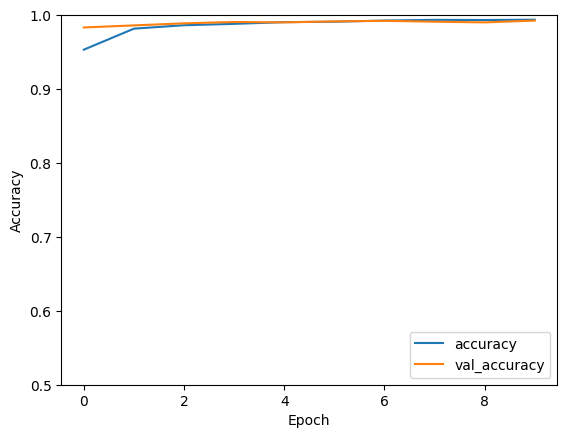

In [ ]:
show_history(history)

Пока мы не отошли от MNIST, на этом же датасете обучите автоэнкодер, выходом которого должны быть картинки того же размера. Выведете несколько исходных картинок в паре с их обработанными вариантами по итогу обучения.

In [ ]:
input_img = tf.keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

decoded_imgs = autoencoder.predict(x_test)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.2013 - val_loss: 0.0761
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0755 - val_loss: 0.0716
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0717 - val_loss: 0.0696
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0700 - val_loss: 0.0685
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0689 - val_loss: 0.0678
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0681 - val_loss: 0.0673
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0676 - val_loss: 0.0668
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0670 - val_loss: 0.0663
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0667 - val_loss: 0.0659
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0664 - val_loss: 0.0657
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


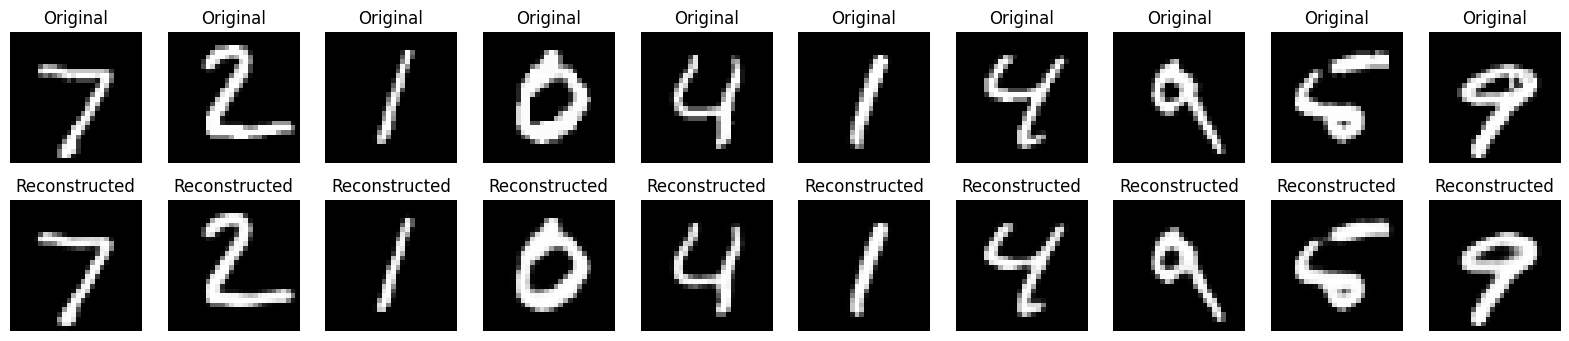

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

Теперь - задача бинарной классификации. Импортируйте датасет по ссылке: https://www.kaggle.com/datasets/tongpython/cat-and-dog. Можно загрузить его на google drive или же подгрузить прямо по ссылке с помощью библиотеки opendatasets. Выполните классификацию с помощью обычной сверточной сети, resnet50 (weights=None) и vgg16. Сравните динамику (на кривых обучения), скорость и конечные результаты обучения.

In [4]:
od.download("https://www.kaggle.com/datasets/tongpython/cat-and-dog")
data_dir = 'cat-and-dog/training_set/training_set'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(150, 150),
    batch_size=32)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(150, 150),
    batch_size=32)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bogdanzaharkin8
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Found 8005 files belonging to 2 classes.
Using 1601 files for validation.


In [ ]:
model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.5447 - loss: 487.3619 - val_accuracy: 0.5172 - val_loss: 0.7202
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.6446 - loss: 0.6201 - val_accuracy: 0.5209 - val_loss: 0.7992
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.7574 - loss: 0.4542 - val_accuracy: 0.5340 - val_loss: 0.9750
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.8537 - loss: 0.3083 - val_accuracy: 0.5771 - val_loss: 1.3491
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9168 - loss: 0.1922 - val_accuracy: 0.5753 - val_loss: 1.7294
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.9497 - loss: 0.1368 - val_accuracy: 0.5665 - val_loss: 1.9577
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9573 - loss: 0.1191 - val_accuracy: 0.5759 - val_loss: 2.3401
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9693 - loss: 0.0943 - v

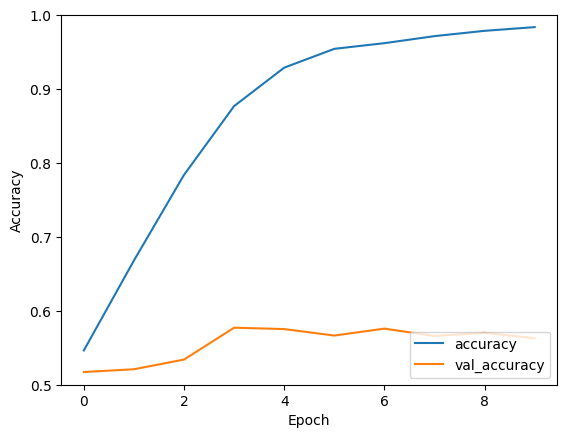

In [ ]:
show_history(history)

In [19]:
input_layer = layers.Input(shape=(150, 150, 3))
base_model = ResNet50(include_top=False, weights=None, input_tensor=input_layer)
x = layers.GlobalAveragePooling2D()(base_model.output)
output_layer = layers.Dense(1, activation='sigmoid')(x)

resnet_model = models.Model(inputs=input_layer, outputs=output_layer)

resnet_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

resnet_history = resnet_model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 117s 319ms/step - accuracy: 0.5450 - loss: 1.0771 - val_accuracy: 0.4997 - val_loss: 6.6717
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 95s 180ms/step - accuracy: 0.6377 - loss: 0.6638 - val_accuracy: 0.5353 - val_loss: 1.5690
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 41s 182ms/step - accuracy: 0.6369 - loss: 0.6521 - val_accuracy: 0.6446 - val_loss: 0.6566
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 41s 181ms/step - accuracy: 0.6702 - loss: 0.6119 - val_accuracy: 0.4997 - val_loss: 3.1570
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 41s 180ms/step - accuracy: 0.6904 - loss: 0.6006 - val_accuracy: 0.5634 - val_loss: 0.9988
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 36s 180ms/step - accuracy: 0.6769 - loss: 0.6033 - val_accuracy: 0.5434 - val_loss: 2.2119
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 37s 182ms/step - accuracy: 0.7436 - loss: 0.5331 - val_accuracy: 0.5603 - val_loss: 1.6300
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 41s 182ms/step - accuracy: 0.7563 - loss: 

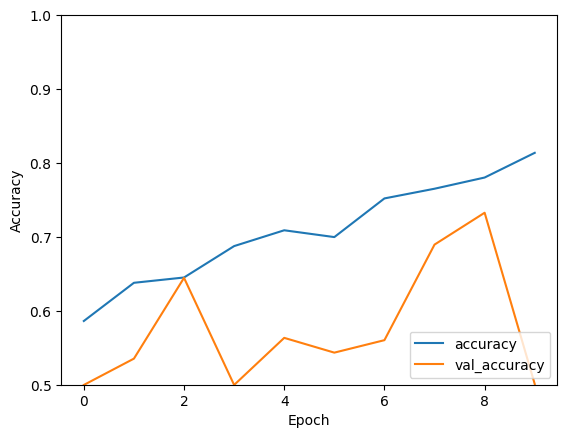

In [20]:
show_history(resnet_history)

In [25]:
input_layer = layers.Input(shape=(150, 150, 3))
base_model = VGG16(include_top=False, input_tensor=input_layer)
x = layers.GlobalAveragePooling2D()(base_model.output)
output_layer = layers.Dense(1, activation='sigmoid')(x)

vgg_model = models.Model(inputs=input_layer, outputs=output_layer)

vgg_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

vgg_history = vgg_model.fit(train_ds, epochs=10, validation_data=val_ds)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 62s 278ms/step - accuracy: 0.4977 - loss: 10.6386 - val_accuracy: 0.5116 - val_loss: 0.6931
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 77s 264ms/step - accuracy: 0.4968 - loss: 0.6932 - val_accuracy: 0.4878 - val_loss: 0.6932
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 81s 262ms/step - accuracy: 0.4965 - loss: 0.6932 - val_accuracy: 0.4878 - val_loss: 0.6932
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 82s 263ms/step - accuracy: 0.5059 - loss: 0.6931 - val_accuracy: 0.4878 - val_loss: 0.6933
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 82s 264ms/step - accuracy: 0.5031 - loss: 0.6931 - val_accuracy: 0.4878 - val_loss: 0.6933
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 53s 261ms/step - accuracy: 0.5026 - loss: 0.6931 - val_accuracy: 0.4878 - val_loss: 0.6933
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 83s 265ms/step - accuracy: 0.5020 - loss: 0.6932 - val_accuracy: 0.4878 - val_loss: 0.6933
Epoch 8/10
201/201 ━━━━━━━━━━━━

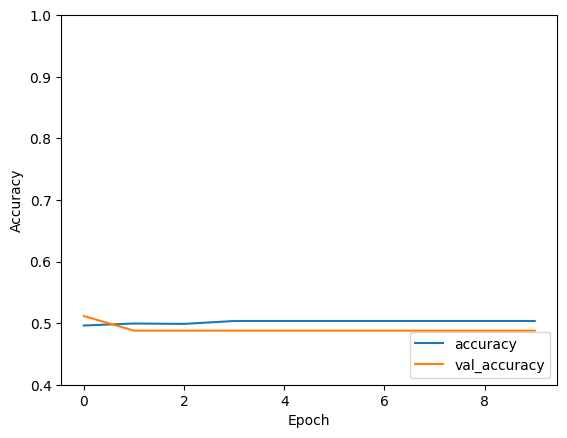

In [27]:
plt.plot(vgg_history.history['accuracy'], label='accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')
plt.show()

Явно использую как-то неправильно...

Теперь остановимся на архитектуре, включающей в себя resnet, и рассмотрим два способа дополнения обычной модели. Во-первых, можно аугментировать данные. Ознакомьтесь со слоями аугментации (https://keras.io/api/layers/preprocessing_layers/image_augmentation/) и обучите модель уже на модифицированных изображениях с нуля, но с сохранением той же архитектуры и тех же параметров обучения. Сравните с исходным результатом. (Ссылка для pytorch: https://pytorch.org/vision/stable/transforms.html)

In [10]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

In [11]:
input_layer = tf.keras.Input(shape=(150, 150, 3))
x = data_augmentation(input_layer)
base_model = ResNet50(include_top=False, weights=None, input_tensor=x)
x = layers.GlobalAveragePooling2D()(base_model.output)
output_layer = layers.Dense(1, activation='sigmoid')(x)

resnet_model = models.Model(inputs=input_layer, outputs=output_layer)

resnet_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

resnet_aug_history = resnet_model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 110s 327ms/step - accuracy: 0.5570 - loss: 0.9909 - val_accuracy: 0.5409 - val_loss: 0.7584
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 73s 314ms/step - accuracy: 0.5989 - loss: 0.6893 - val_accuracy: 0.5103 - val_loss: 1.0615
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 80s 303ms/step - accuracy: 0.6132 - loss: 0.6674 - val_accuracy: 0.5840 - val_loss: 0.9524
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 83s 307ms/step - accuracy: 0.6272 - loss: 0.6483 - val_accuracy: 0.6602 - val_loss: 0.6304
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 82s 308ms/step - accuracy: 0.6352 - loss: 0.6428 - val_accuracy: 0.6315 - val_loss: 0.6729
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 84s 316ms/step - accuracy: 0.6627 - loss: 0.6151 - val_accuracy: 0.6808 - val_loss: 0.6119
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 82s 317ms/step - accuracy: 0.6585 - loss: 0.6287 - val_accuracy: 0.4903 - val_loss: 3.7325
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 80s 307ms/step - accuracy: 0.6712 - loss: 

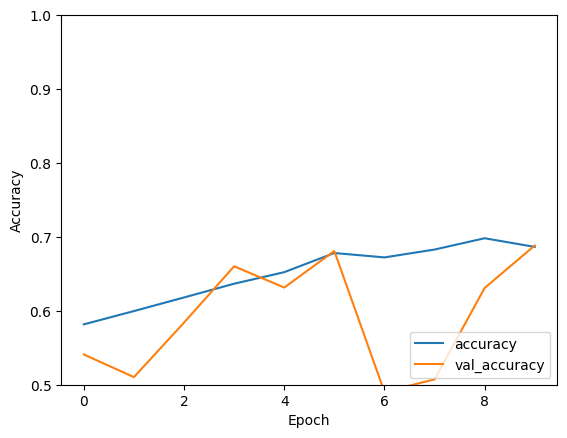

In [12]:
show_history(resnet_aug_history)

Наконец, используйте перенос обучения. Для этого достаточно просто установить параметр weights='imagenet'. Перенос обучения позволяет установить веса в начале обучения определенным образом вместо рандомной инициализации, в данном случае используются веса resnet50, обученного на датасете imagenet. Точно также обучите сеть, сохраняя все остальные параметры, на немодифицированных данных, и сравните результаты.

In [13]:
input_layer = layers.Input(shape=(150, 150, 3))
base_model = ResNet50(include_top=False, weights='imagenet', input_tensor=input_layer)
x = layers.GlobalAveragePooling2D()(base_model.output)
output_layer = layers.Dense(1, activation='sigmoid')(x)

resnet_model = models.Model(inputs=input_layer, outputs=output_layer)

resnet_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

resnet_imagenet_history = resnet_model.fit(train_ds, epochs=10, validation_data=val_ds)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 116s 319ms/step - accuracy: 0.7946 - loss: 0.5601 - val_accuracy: 0.7108 - val_loss: 1.3053
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 96s 180ms/step - accuracy: 0.9224 - loss: 0.1814 - val_accuracy: 0.8720 - val_loss: 0.3089
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 41s 180ms/step - accuracy: 0.9410 - loss: 0.1458 - val_accuracy: 0.9032 - val_loss: 0.2754
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 41s 179ms/step - accuracy: 0.9564 - loss: 0.1089 - val_accuracy: 0.8570 - val_loss: 0.3348
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 41s 179ms/step - accuracy: 0.9213 - loss: 0.1886 - val_accuracy: 0.9032 - val_loss: 0.3057
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 41s 179ms/step - accuracy: 0.9708 - loss: 0.0822 - val_accuracy: 0.8251 - val_loss: 0.5704
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 36s 180ms/step - accuracy: 0.9373 - loss: 0.1721 - val_accuracy: 0.9057 - val_loss: 0.2357
Epoch 8/10
201/201 ━━━━━━━━━━━━

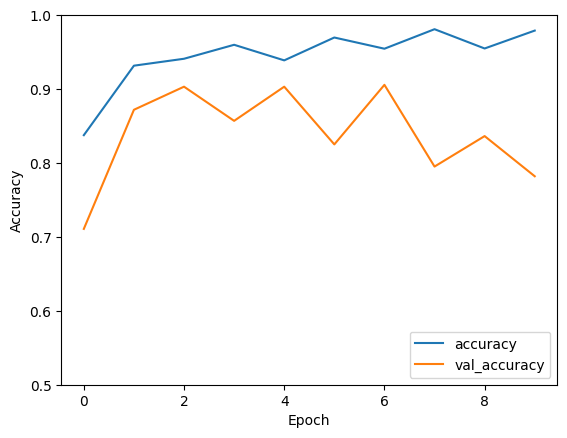

In [14]:
show_history(resnet_imagenet_history)